In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from pprint import pprint

In [39]:
def equation(x):
    eq  = '1*(x**3) + 1*(x**2) + 1*x + 3'
    return eval(eq)

In [40]:
np.random.seed(2)

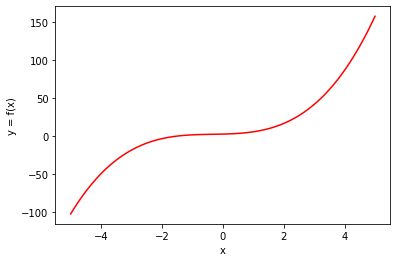

In [41]:
#creating sample data

xdata = np.linspace(-5.0, 5.0, num = 100)
ydata = [equation(x) for x in xdata]
plt.plot(xdata, ydata,  'r')
plt.ylabel('y = f(x)')
plt.xlabel('x')
plt.show()

In [42]:
#adding noise 

noise = 20 * np.random.normal(size=xdata.size)
y_with_noise = ydata + noise

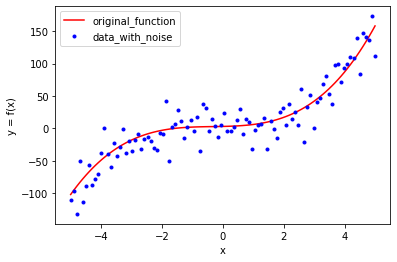

In [43]:
plt.plot(xdata, ydata,  'r', label = 'original_function')
plt.plot(xdata,y_with_noise, 'b.' , label = 'data_with_noise')
plt.ylabel('y = f(x)')
plt.xlabel('x')
plt.legend()
plt.show()

In [44]:
#fitting data with np.polyfit

eqs= []

for indx in range(10):

    z1 = np.polyfit(xdata, y_with_noise, indx)
    z2 = [round(coefficient,3) for coefficient in z1]
    eq = ''

    #for readability formatting coeffients in equations form
    for coeff in z2:
        eq += f'+{coeff}*(x**{indx})'
        indx-=1
        
    eqs.append(eq)
    
pprint(eqs)

['+9.427*(x**0)',
 '+16.934*(x**1)+9.427*(x**0)',
 '+0.888*(x**2)+16.934*(x**1)+1.875*(x**0)',
 '+1.076*(x**3)+0.888*(x**2)+0.464*(x**1)+1.875*(x**0)',
 '+-0.01*(x**4)+1.076*(x**3)+1.099*(x**2)+0.464*(x**1)+1.339*(x**0)',
 '+-0.018*(x**5)+-0.01*(x**4)+1.576*(x**3)+1.099*(x**2)+-2.266*(x**1)+1.339*(x**0)',
 '+-0.013*(x**6)+-0.018*(x**5)+0.446*(x**4)+1.576*(x**3)+-2.774*(x**2)+-2.266*(x**1)+6.037*(x**0)',
 '+-0.001*(x**7)+-0.013*(x**6)+0.022*(x**5)+0.446*(x**4)+1.122*(x**3)+-2.774*(x**2)+-0.98*(x**1)+6.037*(x**0)',
 '+0.0*(x**8)+-0.001*(x**7)+-0.032*(x**6)+0.022*(x**5)+0.727*(x**4)+1.122*(x**3)+-4.075*(x**2)+-0.98*(x**1)+6.956*(x**0)',
 '+-0.001*(x**9)+0.0*(x**8)+0.033*(x**7)+-0.032*(x**6)+-0.59*(x**5)+0.727*(x**4)+5.11*(x**3)+-4.075*(x**2)+-7.895*(x**1)+6.956*(x**0)']


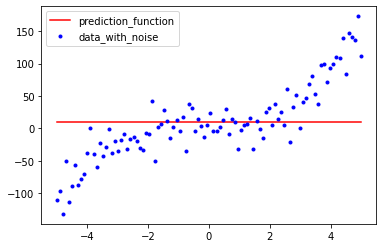

rmse : 57.84772514294925


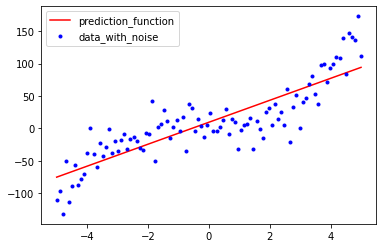

rmse : 30.13869412413643


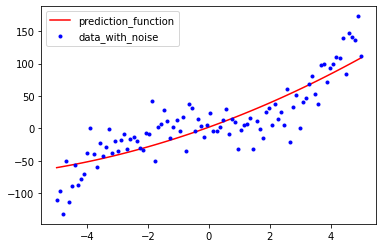

rmse : 29.372363078191857


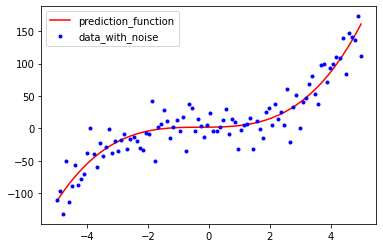

rmse : 20.587260538836723


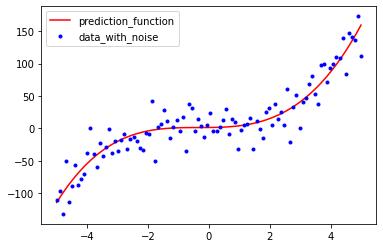

rmse : 20.581890672272365


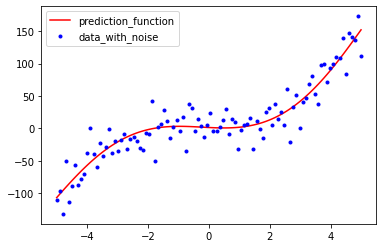

rmse : 20.465541897816777


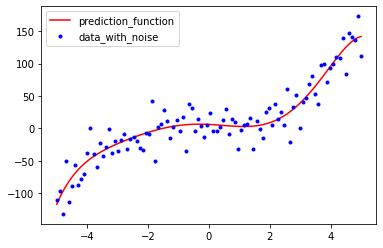

rmse : 20.043065215092945


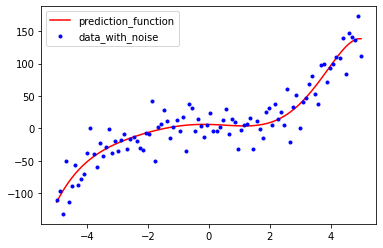

rmse : 20.034285024431473


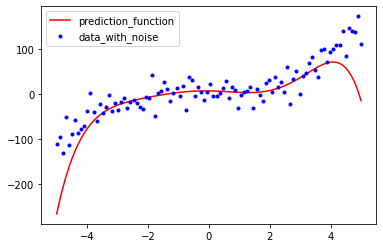

rmse : 44.86535892347435


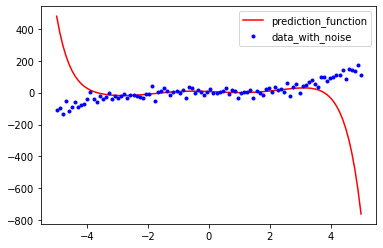

rmse : 191.0639690861684


In [45]:
for e in eqs:
    
    y_predict = [eval(e) for x in xdata]
    plt.plot(xdata,y_predict , 'r', label = 'prediction_function')
    plt.plot(xdata,y_with_noise, 'b.' , label = 'data_with_noise')
    plt.legend()
    plt.show()

    mse = mean_squared_error(y_with_noise, y_predict)
    print('rmse :', sqrt(mse))